In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import datasets

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
def plot_4_classifiers(X, y, clfs):

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    for clf, ax, title in zip(clfs, sub.flatten(), ("(1)", "(2)", "(3)", "(4)")):
        # clf.fit(X, y)
        plot_classifier(X, y, clf, ax, ticks=True)
        ax.set_title(title)
    plt.show()

def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """

    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
    #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#     ax.set_xlabel(data.feature_names[0])
#     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
#     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

<h1>Chaper 1</h1>

KNN classification
In this exercise you'll explore a subset of the <a href='http://ai.stanford.edu/~amaas/data/sentiment/'>Large Movie Review</a> Dataset. The variables X_train, X_test, y_train, and y_test are already loaded into the environment. The X variables contain features based on the words in the movie reviews, and the y variables contain labels for whether the review sentiment is positive (+1) or negative (-1).

In [3]:
#import and clean data from the link

In [4]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on the test features, print the results
pred = knn.predict(X_test)[0]
print("Prediction for test example 0:", pred)

NameError: name 'X_train' is not defined

<h2>Running LogisticRegression and SVC</h2>
In this exercise, you'll apply logistic regression and a support vector machine to classify images of handwritten digits.

In [7]:
from sklearn import datasets
digits = datasets.load_digits()
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)
print(lr.score(Xtrain, ytrain))
print(lr.score(Xtest, ytest))

# Apply SVM and print scores
svm = SVC()
svm.fit(Xtrain, ytrain)
print(svm.score(Xtrain, ytrain))
print(svm.score(Xtest, ytest))

0.9962880475129918
0.9622222222222222
1.0
0.5555555555555556


<h2>Sentiment analysis for movie reviews</h2>
In this exercise you'll explore the probabilities outputted by logistic regression on a subset of the Large Movie Review Dataset. The variables X and y are already loaded into the environment. X contains features based on the number of times words appear in the movie reviews, and y contains labels for whether the review sentiment is positive (+1) or negative (-1).

In [8]:
# Instantiate logistic regression and train
lr = LogisticRegression()
lr.fit(X,y)

# Predict sentiment for a glowing review
review1 = "LOVED IT! This movie was amazing. Top 10 this year."
review1_features = get_features(review1)
print("Review:", review1)
print("Probability of positive review:", lr.predict_proba(review1_features)[0,1])

# Predict sentiment for a poor review
review2 = "Total junk! I'll never watch a film by that director again, no matter how good the reviews."
review2_features = get_features(review2)
print("Review:", review2)
print("Probability of positive review:", lr.predict_proba(review2_features)[0,1])

NameError: name 'X' is not defined

Fantastic! The second probability would have been even lower, but the word "good" trips it up a bit, since that's considered a "positive" word.

<h2>Visualizing decision boundaries</h2>
In this exercise, you'll visualize the decision boundaries of various classifier types. A subset of scikit-learn's built-in wine dataset is already loaded into X along with binary labels in y.

In [ ]:
# load scikit-learn wine dataset
#Create plot_4_classifiers based on this link: https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Define the classifiers
classifiers = [LogisticRegression(), LinearSVC(), SVC(), KNeighborsClassifier()]

# Fit the classifiers
for c in classifiers:
    c.fit(X, y)

# Plot the classifiers
plot_4_classifiers(X, y, classifiers)
plt.show()

NameError: name 'X' is not defined

<h1>Chapter 2</h1>

<h2>Changing the model coefficients</h2>
In this exercise, you will observe the effects of changing the coefficients of a linear classifer. A 2D dataset is already loaded into the environment as X and y, along with a linear classifier object model.

In [11]:
X = np.array([[ 1.78862847,  0.43650985],
       [ 0.09649747, -1.8634927 ],
       [-0.2773882 , -0.35475898],
       [-3.08274148,  2.37299932],
       [-3.04381817,  2.52278197],
       [-1.31386475,  0.88462238],
       [-2.11868196,  4.70957306],
       [-2.94996636,  2.59532259],
       [-3.54535995,  1.45352268],
       [ 0.98236743, -1.10106763],
       [-1.18504653, -0.2056499 ],
       [-1.51385164,  3.23671627],
       [-4.02378514,  2.2870068 ],
       [ 0.62524497, -0.16051336],
       [-3.76883635,  2.76996928],
       [ 0.74505627,  1.97611078],
       [-1.24412333, -0.62641691],
       [-0.80376609, -2.41908317],
       [-0.92379202, -1.02387576],
       [ 1.12397796, -0.13191423]])

y = np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1])

model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

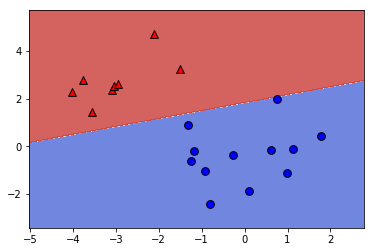

Number of errors: 0


In [12]:
# Set the coefficients
model.coef_ = np.array([[-2,6]])
model.intercept_ = np.array([-11])

# Plot the data and decision boundary
plot_classifier(X,y,model)

# Print the number of errors
num_err = np.sum(y != model.predict(X))
print("Number of errors:", num_err)

<h2>Minimizing a loss function</h2>
In this exercise you'll implement linear regression "from scratch" using scipy.optimize.minimize. We'll train a model on the Boston housing price data set, which is already loaded into the variables X and y. For simplicity, we won't include an intercept in our regression model.

In [14]:
from scipy.optimize import minimize

# The squared error, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_pred - y_i_true)**2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

[-0.10279794  0.24559517]


NameError: name 'LinearRegression' is not defined

Great job! This was a tough one. Isn't it cool how you reproduce the weights learned by scikit-learn?

<h2>Comparing the logistic and hinge losses</h2>
In this exercise you'll create a plot of the logistic and hinge losses using their mathematical expressions, which are provided to you. The loss function diagram from the video is shown on the right.

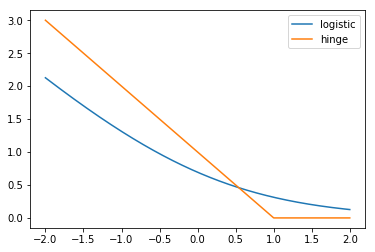

In [15]:
# Mathematical functions for logistic and hinge losses
# Feel free to ignore if you're not interested
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

<h2>Implementing logistic regression</h2>
This is very similar to the earlier exercise where you implemented linear regression "from scratch" using scipy.optimize.minimize. However, this time we'll minimize the logistic loss and compare with scikit-learn's LogisticRegression (we've set C to a large value to disable regularization; more on this in Chapter 3!). The log_loss function from the previous exercise is already defined in your environment, and the sklearn breast cancer prediction dataset (first 10 features, standardized) is loaded into the variables X and y.

In [16]:
# The logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        raw_model_output = w@X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X,y)
print(lr.coef_)

[-0.41509489  0.88447546]
[[-0.4150946   0.88447526]]


Great job! As you can see, logistic regression is just minimizing the loss function we've been looking at. Much more on logistic regression in the next chapter!

<h1>Chapter 3</h1>

<h2>Regularized logistic regression</h2>
In Chapter 1 you used logistic regression on the handwritten digits data set. Here, we'll explore the effect of L2 regularization. The handwritten digits dataset is already loaded, split, and stored in the variables X_train, y_train, X_valid, and y_valid. The variables train_errs and valid_errs are already initialized as empty lists.

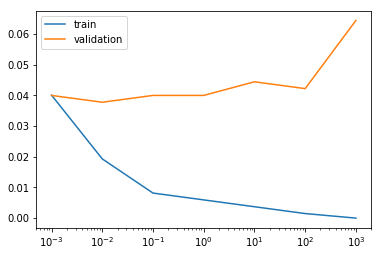

In [19]:
digits = datasets.load_digits()
X_train, X_valid, y_train, y_valid = train_test_split(digits.data, digits.target)

train_errs, valid_errs = [],[]


C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# Loop over values of C
for C_value in C_values:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value)
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_valid, y_valid) )
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

Congrats! As you can see, too much regularization (small C) doesn't work well - due to underfitting - and too little regularization (large C) doesn't work well either - due to overfitting.

<h2>Logistic regression and feature selection</h2>
In this exercise we'll perform feature selection on the movie review sentiment data set using L1 regularization. The features and targets are already loaded for you in X_train and y_train. We'll search for the best value of C using scikit-learn's GridSearchCV, which was covered in the prerequisite course.

In [ ]:
# Specify L1 regularization
lr = LogisticRegression(penalty='l1')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Best CV params {'C': 1}

Total number of features: 2500

Number of selected features: 1219

Great job! As you can see, a whole lot of features were discarded here.

<h2>Identifying the most positive and negative words</h2>

In this exercise we'll try to interpret the coefficients of a logistic regression fit on the movie review sentiment data set. The model object is already instantiated and fit for you in the variable lr.

In addition, the words corresponding to the different features are loaded into the variable vocab. For example, since vocab[100] is "think", that means feature 100 corresponds to the number of times the word "think" appeared in that movie review.

In [ ]:
# Get the indices of the sorted cofficients
inds_ascending = np.argsort(lr.coef_.flatten()) 
inds_descending = inds_ascending[::-1]

# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(vocab[inds_descending[i]], end=", ")
print("\n")

# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(vocab[inds_ascending[i]], end=", ")
print("\n")

Most positive words: favorite, superb, noir, knowing, loved, 

Most negative words: disappointing, waste, worst, boring, lame,

<h2>Regularization and probabilities</h2>
In this exercise, you will observe the effects of changing the regularization stength on the predicted probabilities. A 2D binary classification dataset is already loaded into the environment as X and y.

In [23]:
X = np.array([[ 1.78862847,  0.43650985],
       [ 0.09649747, -1.8634927 ],
       [-0.2773882 , -0.35475898],
       [-3.08274148,  2.37299932],
       [-3.04381817,  2.52278197],
       [-1.31386475,  0.88462238],
       [-2.11868196,  4.70957306],
       [-2.94996636,  2.59532259],
       [-3.54535995,  1.45352268],
       [ 0.98236743, -1.10106763],
       [-1.18504653, -0.2056499 ],
       [-1.51385164,  3.23671627],
       [-4.02378514,  2.2870068 ],
       [ 0.62524497, -0.16051336],
       [-3.76883635,  2.76996928],
       [ 0.74505627,  1.97611078],
       [-1.24412333, -0.62641691],
       [-0.80376609, -2.41908317],
       [-0.92379202, -1.02387576],
       [ 1.12397796, -0.13191423]])

y = np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1])

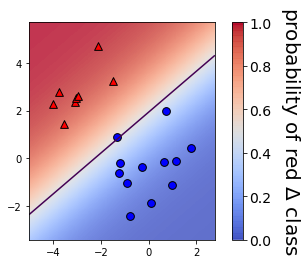

Maximum predicted probability 0.9761229967078282


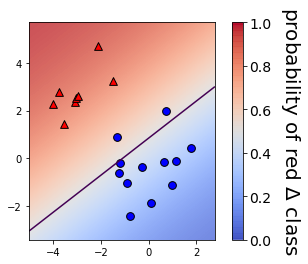

Maximum predicted probability 0.8990965658995651


In [26]:
# Set the regularization strength
model = LogisticRegression(C=1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

# Set the regularization strength
model = LogisticRegression(C=0.1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

You got it! As you probably noticed, smaller values of C lead to less confident predictions. That's because smaller C means more regularization, which in turn means smaller coefficients, which means raw model outputs closer to zero and, thus, probabilities closer to 0.5 after the raw model output is squashed through the sigmoid function. That's quite a chain of events!

<h2>Visualizing easy and difficult examples</h2>
In this exercise, you'll visualize the examples that the logistic regression model is most, and least, confident about by looking at the largest, and smallest, predicted probabilities. The handwritten digits dataset is already loaded into the variables X and y. The show_digit function takes in an integer index and plots the corresponding image, with some extra information displayed above the image.

In [27]:
def show_digit(i, lr=None):
    plt.imshow(np.reshape(X[i], (8,8)), cmap='gray', vmin = 0, vmax = 16, interpolation=None)
    plt.xticks(())
    plt.yticks(())
    if lr is None:
        plt.title("class label = %d" % y[i])
    else:
        pred = lr.predict(X[i][None])
        pred_prob = lr.predict_proba(X[i][None])[0,pred]
        plt.title("label=%d, prediction=%d, proba=%.2f" % (y[i], pred, pred_prob))
    plt.show()

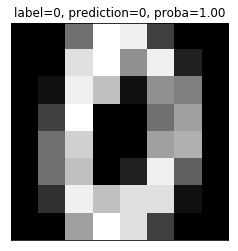

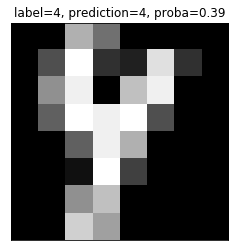

In [28]:
digits = datasets.load_digits()
X, y = digits.data, digits.target

lr = LogisticRegression()
lr.fit(X,y)

# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probability
proba_inds = np.argsort(np.max(proba,axis=1))

# Show the most confident (least ambiguous) digit
show_digit(proba_inds[-1], lr)

# Show the least confident (most ambiguous) digit
show_digit(proba_inds[0], lr)

Great job! As you can see, the least confident example looks like a weird 4, and the most confident example looks like a very typical 0.

<h2>Fitting multi-class logistic regression</h2>
In this exercise, you'll fit the two types of multi-class logistic regression, one-vs-rest and softmax/multinomial, on the handwritten digits data set and compare the results. The handwritten digits dataset is already loaded and split into X_train, y_train, X_test, and y_test.

In [29]:
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [30]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression()
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

OVR training accuracy: 0.9962880475129918
OVR test accuracy    : 0.9711111111111111
Softmax training accuracy: 1.0
Softmax test accuracy    : 0.96


Nice work! As you can see, the accuracies of the two methods are fairly similar on this data set.

<h2>Visualizing multi-class logistic regression</h2>
In this exercise we'll continue with the two types of multi-class logistic regression, but on a toy 2D data set specifically designed to break the one-vs-rest scheme. The data set is loaded into X_train and y_train. The two logistic regression objects, lr_mn and lr_ovr, are already instantiated (with C=100), fit, and plotted. Notice that lr_ovr never predicts the dark blue class... yikes! Let's explore why this happens by plotting one of the binary classifiers that it's using behind the scenes.

In [35]:
X_train = np.array([[-2.83895657e-01, -9.51457706e-01],
       [ 5.33624372e-01,  1.23918071e+00],
       [-1.17337815e+00, -1.21258188e-01],
       [-1.19338379e+00,  7.97747166e-01],
       [-3.74902201e-01, -3.99647889e-01],
       [-1.11678880e+00, -3.63057976e-01],
       [ 3.92567929e-02, -1.03949311e+00],
       [-4.60496902e-01,  7.92206150e-01],
       [ 3.73372234e-01,  4.49455588e-01],
       [-5.68303256e-01, -1.12326024e+00],
       [-8.10825377e-01, -6.71197010e-01],
       [-2.23456895e-01,  5.01300063e-01],
       [ 3.31395128e-01, -8.81087488e-01],
       [ 1.23187925e+00,  6.36307263e-01],
       [-1.19438566e-01, -1.70031450e+00],
       [-3.56432381e-01,  8.17597947e-01],
       [ 3.68396844e-01, -4.89405078e-01],
       [-2.55373639e-01, -4.18075333e-01],
       [-1.32645347e+00,  1.04344987e+00],
       [-5.92850474e-01, -8.01421997e-01],
       [ 7.27961902e-01, -1.12489821e+00],
       [-2.13511481e+00,  1.53256634e+00],
       [ 2.30542073e-01, -8.68803803e-01],
       [ 1.09813977e+00,  5.83409537e-01],
       [ 8.38336530e-01,  6.17109567e-01],
       [ 4.86438237e-01,  3.06669383e-01],
       [ 7.86915440e-01,  4.44667097e-01],
       [-4.78932579e-01, -5.66539851e-01],
       [-2.03300554e-01,  9.36879327e-01],
       [ 3.39165831e-01,  8.12534012e-01],
       [-3.61733276e-01,  3.63540549e-01],
       [ 1.18603363e+00, -2.01359716e+00],
       [-4.87253757e-01, -6.37446081e-01],
       [-1.88698497e-01, -5.82874621e-01],
       [ 9.81411621e-01,  1.33941738e+00],
       [ 1.50189299e+00,  1.03081206e+00],
       [-6.44426536e-02, -3.81126339e-01],
       [ 1.28839740e+00,  1.54321683e+00],
       [-9.02379254e-01,  2.12912925e-01],
       [-2.75943790e-01,  6.62190410e-01],
       [ 1.85875489e-04, -2.22687852e+00],
       [-1.36218486e-01, -6.12143582e-01],
       [-8.01189309e-01, -7.31571602e-01],
       [-1.31114360e+00, -1.11160107e-01],
       [-1.82715882e-01,  3.45742341e-01],
       [ 1.62577984e+00,  9.82365559e-02],
       [ 1.18754221e+00, -9.88047256e-01],
       [ 3.30896348e-01,  1.74147081e+00],
       [ 1.06319463e+00,  7.25707477e-01],
       [-6.31172777e-02,  5.03138338e-01],
       [ 3.70221639e-01,  1.27315366e+00],
       [-3.14443989e-03, -2.64384583e-01],
       [ 3.57484301e-01, -2.27657772e-02],
       [-7.10889392e-01,  1.54688358e+00],
       [ 7.62329973e-01,  1.33254405e+00],
       [-1.55233553e+00, -1.52337441e+00],
       [-1.00339689e+00,  2.11862140e+00],
       [ 7.22823193e-01,  3.35405706e-01],
       [ 9.12755253e-02, -5.04468641e-01],
       [ 4.95114934e-02, -2.44690106e-01],
       [-1.40309968e+00, -5.12395416e-01],
       [-7.75501690e-01, -6.02394114e-01],
       [ 1.24435378e+00,  1.05314888e+00],
       [-2.23130848e-02,  1.87403279e+00],
       [-2.22779816e+00,  1.27046867e+00],
       [ 4.42928990e-02,  5.97549446e-01],
       [ 1.14098613e+00,  8.51490630e-01],
       [ 1.44165046e+00, -8.66600209e-01],
       [ 1.32295140e-01,  1.62653413e+00],
       [ 3.69308441e-02,  1.67786453e+00],
       [-6.12975983e-01, -1.35405850e+00],
       [ 8.22080441e-01, -7.45448227e-01],
       [-1.03015455e+00,  1.57828451e+00],
       [-1.27392825e+00, -1.19848757e-01],
       [-4.22882508e-01, -3.05961769e-01],
       [ 1.05127378e+00, -2.29052289e+00],
       [-7.89554501e-01,  8.57037168e-04],
       [ 3.73018740e-01, -4.98468373e-01],
       [-7.21550677e-01, -5.22821271e-01],
       [ 1.91021707e+00, -1.52700869e+00],
       [ 6.18671454e-01,  5.31270233e-01],
       [-1.12104559e+00,  2.87688027e+00],
       [ 1.21061741e+00, -5.48616370e-01],
       [-1.25680616e+00, -6.13281706e-02],
       [-1.50756706e+00,  4.18340765e-01],
       [ 7.11133123e-01, -7.15113895e-01],
       [-4.22620092e-01,  5.79287166e-01],
       [-9.34751978e-01,  3.60387487e-02],
       [ 1.21135650e+00, -5.78726752e-01],
       [-1.15320171e+00, -4.85969087e-02],
       [ 2.62171741e+00,  7.01010427e-01],
       [-1.48673284e-02, -9.33967286e-01],
       [-4.71193685e-01,  1.48297028e-01],
       [ 2.19748594e+00,  8.18579786e-02],
       [ 8.95326539e-01, -8.20358903e-01],
       [-6.17111080e-01,  1.27571264e+00],
       [ 1.09948335e+00, -1.26033634e+00],
       [-2.59602194e-01,  7.62758510e-01],
       [ 8.26861357e-01, -8.98524452e-01],
       [ 1.17328060e+00, -2.02972829e-01],
       [ 9.44652675e-02,  1.11263639e+00],
       [ 7.93685036e-02,  2.91707420e-01],
       [ 8.55134983e-01, -1.86820269e+00],
       [-3.33377592e-02, -8.21471683e-01],
       [ 1.08195801e+00, -9.12742251e-01],
       [-9.59114991e-01, -9.32883669e-01],
       [-1.09944058e-01,  4.29168341e-01],
       [ 8.47500557e-01,  2.00541178e-01],
       [ 8.97969301e-01, -1.34475096e+00],
       [-7.45549265e-01,  3.38558393e+00],
       [-2.35167941e-01,  1.16971717e-01],
       [ 3.82228847e-01, -1.89098191e+00],
       [ 4.46548315e-01, -1.90550205e-01],
       [ 1.03125402e+00, -6.10175894e-01],
       [ 8.98533636e-01, -8.27191628e-01],
       [-1.33555205e+00, -8.75184223e-01],
       [-3.82730422e-01,  1.30044462e+00],
       [ 7.03771022e-02,  3.63324429e-01],
       [-3.82547777e-01, -1.33433884e-02],
       [-9.28831114e-01, -1.24595217e-01],
       [-4.18020419e-01,  4.48693923e-02],
       [-1.14297594e+00, -4.20076628e-01],
       [-1.34085140e+00, -1.04693788e+00],
       [-5.75321695e-01, -1.87324354e+00],
       [ 1.05179314e+00,  1.50698744e-01],
       [-2.41168156e-01, -4.36437276e-01],
       [ 1.46929860e+00, -9.03666003e-01],
       [ 2.39422640e-01, -2.90113812e-01],
       [ 4.08505448e-01,  4.27716109e-01],
       [ 1.03080433e+00, -1.54913404e-03],
       [-1.02676711e+00,  7.21155407e-01],
       [ 1.24298760e+00,  6.05352492e-01],
       [ 9.98158704e-02,  7.85882456e-01],
       [-3.30989273e-01,  1.87923919e-01],
       [ 1.46427195e-01, -7.74987386e-01],
       [ 6.27556539e-01,  2.16992322e+00],
       [ 1.91133871e-01,  1.70918433e+00],
       [-3.87055670e-01, -1.23621603e+00],
       [ 1.30466697e+00,  1.89116566e-01],
       [-1.00664113e+00, -1.82069688e+00],
       [ 2.04048554e-01,  1.18707347e+00],
       [-1.30907152e+00,  5.66034777e-02],
       [ 3.40083444e-01, -9.90222332e-01],
       [ 2.13573178e-01, -2.94037076e+00],
       [-2.36084944e-02, -2.27832455e+00],
       [ 9.22675071e-01,  2.14198658e+00],
       [-8.85698364e-01, -1.82381255e+00],
       [-1.55801959e+00,  7.58114660e-01],
       [ 1.48191669e+00, -7.29229056e-01],
       [ 3.45873152e+00,  3.45013732e-01],
       [-3.87080518e-01,  1.11669888e+00],
       [ 4.38763001e-01,  6.12595812e-01],
       [ 6.72911640e-01,  1.14420429e+00],
       [ 8.93632281e-01,  3.54641572e-01],
       [-6.90807494e-01, -4.59634838e-01],
       [-4.15753108e-01,  2.07834911e+00],
       [ 4.17739748e-01,  1.15217233e+00],
       [-6.49536218e-01, -1.29778992e+00],
       [ 8.79936159e-01, -1.17037420e+00],
       [ 1.32963509e+00,  7.77819970e-01],
       [ 1.67576848e+00,  3.71978129e-01],
       [-1.00808260e+00,  2.57843572e-01],
       [ 1.53015384e+00,  2.27643840e-01],
       [-6.18754318e-01, -6.41954617e-01],
       [-8.71107452e-01,  3.11477892e-01],
       [ 6.37622987e-01,  2.03146691e+00],
       [-3.10980526e-01, -1.79036690e-01],
       [-6.45468284e-01, -1.25491015e+00],
       [ 4.71158947e-01, -2.39641054e+00],
       [-6.47038417e-01,  7.45740049e-01],
       [ 1.11893355e-01,  9.23820401e-02],
       [ 2.46226478e-01,  3.13062906e-01],
       [-1.01089039e-01,  3.62849379e-02],
       [ 1.71659568e-01, -1.35927630e+00],
       [ 3.40480960e-01,  1.16674832e+00],
       [-2.56618477e-01,  2.08152722e+00],
       [ 1.53315515e+00,  2.88728123e-01],
       [-5.31455590e-01,  4.13138729e-01],
       [ 1.39559634e+00,  1.21110653e-01],
       [-2.21472479e-01,  5.40642292e-01],
       [-4.96250861e-01, -3.33320300e-01],
       [ 6.16439064e-01, -1.03542338e+00],
       [-3.12897613e+00,  4.76362013e-01],
       [-6.99437789e-01, -1.75830724e-01],
       [ 1.71519587e+00,  1.01602638e-01],
       [ 5.19186062e-01, -1.35492173e+00],
       [ 6.82204596e-01,  8.73433968e-01],
       [-1.08581585e+00,  1.75168166e-01],
       [-4.22907282e-01, -5.65107061e-01],
       [-3.71555929e-01, -1.42305714e+00],
       [-8.21577003e-01,  5.28010495e-01],
       [ 7.86870071e-02,  9.24843550e-02],
       [-2.16193119e-01,  5.86193381e-01],
       [-1.22548359e+00,  2.48846802e-01],
       [-1.55000064e+00,  1.56518980e+00],
       [-9.60286755e-01, -3.40835920e-01],
       [-1.21420118e+00, -3.54183421e-01],
       [-6.17941477e-01,  8.49677284e-02],
       [-1.26821697e+00,  1.53634503e+00],
       [-1.04121511e-01, -3.09345590e-01],
       [-3.24089313e-01,  9.14684501e-02],
       [-3.46051731e-01,  2.71948412e-01],
       [ 5.49168052e-01, -7.03300534e-02],
       [-6.29554699e-02, -8.28104012e-02],
       [-1.66552903e-01, -6.81026187e-01],
       [-1.86519153e+00, -8.10162292e-01],
       [ 5.66593537e-02, -4.18745854e-01],
       [ 2.34711021e+00, -3.27882927e-02],
       [ 6.42344993e-01,  4.65635453e-01],
       [ 8.19580983e-01, -1.38034832e+00],
       [-1.27525615e+00,  1.62592404e+00],
       [ 4.18990622e-01, -2.34217819e-01],
       [-6.45499218e-01, -1.68068271e-01],
       [ 5.87115685e-01,  1.26968048e+00],
       [-1.38994421e+00, -3.17576787e-01],
       [ 1.33279793e+00,  5.91125442e-01],
       [-1.14989342e+00, -6.18127175e-01],
       [-4.78690715e-01, -1.60450115e+00],
       [ 1.54541507e+00,  1.55276018e-01],
       [ 7.28423987e-01, -3.30380155e-01],
       [-1.07899557e+00,  9.56753137e-01],
       [ 1.73158536e+00, -1.45930768e+00],
       [-8.50859191e-01,  9.46701140e-01],
       [ 6.85189932e-01, -5.03068765e-01],
       [ 6.67027648e-01,  6.86137104e-01],
       [ 2.52037478e+00,  6.25413897e-01],
       [ 1.23372005e+00,  2.51603284e-01],
       [ 5.81184053e-02,  4.51137245e-02],
       [-2.01775288e-01, -8.08414669e-01],
       [-2.83241465e+00,  7.23569524e-01],
       [ 1.11794340e+00,  2.66169426e-01],
       [-1.48414526e+00,  1.41802404e+00],
       [-2.17997557e-01, -4.27031273e-01],
       [ 1.05131170e+00,  1.03823987e+00],
       [ 4.73478589e-01,  2.22850843e+00],
       [ 3.79073150e-01, -4.04320588e-01],
       [-4.85248870e-01, -4.63422678e-01],
       [-6.52513292e-01, -8.00667406e-02],
       [-1.10638994e-01, -9.52893744e-02],
       [ 9.72278149e-01, -6.81695817e-01],
       [-5.74704425e-01,  5.46743761e-01],
       [ 2.61211937e-01, -9.00517980e-02],
       [-3.13766608e-01,  2.99858742e-01],
       [-7.53824274e-01, -3.62056163e-01],
       [-8.57537689e-01,  2.70991980e+00],
       [ 1.17612860e-01,  8.06824976e-01],
       [ 5.63697109e-01,  6.45696112e-01],
       [-1.43600626e+00,  5.59475465e-01],
       [-6.51804104e-01, -6.72113868e-01],
       [ 7.44253455e-01,  5.70717760e-01],
       [-5.96343760e-01, -1.18964250e+00],
       [ 5.96500258e-01,  2.00513480e+00],
       [ 9.46339546e-01,  8.25057696e-01],
       [-9.49552255e-01, -2.12707718e+00],
       [ 7.77784328e-01,  4.12740359e-01],
       [-2.14872339e-02, -3.21881539e-01],
       [ 4.64142337e-01,  4.71265171e-01],
       [-1.00162254e+00,  5.59504404e-02],
       [ 4.22650852e-01,  7.07834832e-01],
       [-4.19091926e-01,  4.21446505e-04],
       [ 3.80532136e-01, -8.62496826e-01],
       [-6.88095193e-01,  3.83724014e-03],
       [-1.38296737e+00,  1.01773102e+00],
       [-1.56727614e-01, -1.00625917e-01],
       [-7.02790559e-01, -5.34264482e-01],
       [ 4.53674228e-01,  2.26399723e-01],
       [-3.70977024e-01, -9.02532647e-01],
       [ 9.95739869e-01, -4.29823772e-01],
       [ 3.21633047e-01, -4.81996737e-01],
       [-3.59761073e-01, -5.19486660e-01],
       [ 2.63949169e-01,  2.54547095e+00],
       [ 4.00202410e-01,  2.16159036e+00],
       [ 8.54602127e-01, -1.08544729e+00],
       [ 1.17409647e-01,  6.72164886e-03],
       [-2.96916269e+00, -7.24299000e-01],
       [ 8.98734164e-01,  2.03360105e+00],
       [ 9.14885199e-01,  2.08795727e+00],
       [ 3.52225950e-01,  1.11807396e-01],
       [-5.02642449e-01, -8.94881511e-01],
       [-2.07926031e-01, -2.26007844e-01],
       [-2.98067495e-01,  1.21007972e+00],
       [ 5.59552710e-01,  6.16856924e-01],
       [-2.13331328e-01, -1.37176907e+00],
       [-7.71592298e-01,  2.56522853e-01],
       [-8.91009324e-02,  5.85928029e-01],
       [-6.59158060e-01,  8.93140184e-01],
       [-1.66256529e-01, -9.80095936e-01],
       [-1.45293634e+00, -6.79306038e-01],
       [ 2.58459533e-01, -1.59507701e+00],
       [-6.16562642e-01,  3.37553869e-01],
       [ 1.99332380e+00,  3.76100676e-01],
       [ 1.31749904e+00,  1.14525370e+00],
       [ 6.77627652e-01, -2.69028412e+00],
       [-7.24054641e-01, -3.00028828e-01],
       [-2.15908250e-01,  1.73361026e+00],
       [-4.26627903e-01,  3.95005345e-02],
       [ 1.13473732e+00, -2.06468477e-01],
       [ 1.56815803e+00, -1.47455508e-01],
       [ 7.86715120e-01, -2.32062876e-01],
       [ 9.87933166e-01,  1.60843618e-01],
       [ 1.90729163e+00,  1.27409312e-01],
       [ 3.59355853e-01, -1.04640821e+00],
       [-9.46647182e-01,  6.22098825e-01],
       [-2.46689280e-01,  2.57307271e-01],
       [ 2.67800451e-01,  4.40998924e-01],
       [-1.83371684e+00, -1.07635433e+00],
       [-7.32318763e-02,  1.25985823e+00],
       [ 6.97274340e-01, -4.56201361e-01],
       [ 9.15469974e-02,  3.47279873e-01],
       [-1.34215495e-01,  1.53634006e+00],
       [-2.01959589e-01,  7.40056156e-01],
       [ 1.29536211e+00, -1.79185232e+00],
       [ 6.35987451e-01,  1.34724258e-02],
       [-7.52186057e-02,  2.37048909e-01],
       [-7.38858807e-01,  4.31069515e-03],
       [ 2.76485783e+00, -1.04532813e+00],
       [-8.28286409e-01,  4.96139031e-01],
       [ 6.72941893e-01, -3.08256204e-01],
       [ 3.56320956e-01, -1.71854210e-01],
       [-1.83052452e-01,  9.93778673e-01],
       [ 6.07162324e-01, -4.87940009e-01],
       [-1.45724708e+00, -5.57288015e-01],
       [-1.95713287e-02, -7.27061061e-01],
       [-3.03595807e-01,  2.45310326e-01],
       [ 4.25748084e-01, -2.73044964e-01],
       [ 1.28042925e+00, -2.17265698e+00],
       [ 1.13616284e+00, -7.01750647e-01],
       [-5.15620443e-01,  4.27429863e-01],
       [ 1.17568017e+00, -1.09936359e-01],
       [-1.36411847e+00, -3.62075361e-02],
       [-3.03338789e-01,  2.32516450e+00],
       [ 4.21265199e-01, -1.48184608e+00],
       [-1.56356664e+00,  2.43979829e-01],
       [-1.89370094e+00, -1.34857851e+00],
       [-1.81369673e+00, -1.04035943e+00],
       [-1.30487016e+00, -6.09707799e-02],
       [-3.87350229e-01, -1.20156767e+00],
       [ 1.85116618e+00, -2.47765287e-02],
       [ 2.55609131e-01,  4.43817616e-01],
       [-7.23423000e-01,  6.87936650e-01],
       [ 7.19675853e-01,  1.63807539e+00],
       [ 4.07528586e-01, -4.57875958e-01],
       [ 1.27239160e+00,  7.54197611e-01],
       [-7.33084811e-01, -1.22625870e+00],
       [-1.00146686e+00,  8.22587011e-01],
       [ 8.74280306e-01, -4.28087542e-02],
       [-2.60254075e+00, -1.04374295e-01],
       [ 2.47129653e-01, -2.39347095e-01],
       [-1.32192531e+00, -2.47002839e-01],
       [-1.50342772e+00,  8.14205321e-01],
       [ 1.31894693e+00, -7.79305377e-01],
       [ 1.07114856e+00,  5.61995551e-01],
       [-9.48056016e-01,  4.62884142e-01],
       [-1.47049629e+00, -3.10810395e-01],
       [-1.52246111e+00, -1.50083105e+00],
       [ 6.62394356e-01,  2.32762068e-01],
       [-1.77646954e+00,  1.80796912e+00],
       [-1.33919576e+00,  4.00842900e-01],
       [ 4.55071208e-01, -8.87571298e-01],
       [-9.27020245e-03, -1.02678468e+00],
       [ 7.87715149e-01, -4.74965423e-01],
       [-6.80287514e-01,  7.01827786e-01],
       [ 2.34664160e-01,  1.02683424e+00],
       [ 8.36586885e-03, -2.05581122e-01],
       [ 1.87547736e+00,  8.75869903e-01],
       [-3.47955037e-01,  1.95290688e+00],
       [-7.67038989e-01,  9.10960121e-02],
       [ 2.63033753e-01,  4.72970318e-01],
       [ 3.09943712e-02,  1.95394133e+00],
       [-1.13433110e+00, -1.95408174e+00],
       [-9.01631724e-02, -3.38637356e-01],
       [ 1.10103317e-01,  1.61216978e+00],
       [ 1.49961133e+00,  2.21729968e-01],
       [-1.18243595e+00,  9.17843166e-01],
       [-1.15438675e+00, -1.19451959e+00],
       [-1.96908372e+00,  1.61768855e+00],
       [ 1.04567355e+00,  1.07875346e+00],
       [ 7.72705301e-01,  9.98823749e-01],
       [-1.35997652e+00, -4.98768895e-01],
       [-9.04834584e-01,  2.33921986e-01],
       [-4.95178016e-01, -4.39195245e-02],
       [-5.93938849e-01,  1.42820254e+00],
       [ 5.59304094e-01, -1.15873862e+00],
       [ 2.16040528e-01, -8.17380088e-02],
       [ 1.91528001e-01, -1.69325925e+00],
       [ 1.10434170e+00,  2.84340339e-01],
       [-1.09580513e+00,  5.86898099e-01],
       [ 6.32328497e-01, -5.91375311e-01],
       [ 2.03614132e+00, -3.90471672e-01],
       [ 5.38816211e-01,  1.25914174e+00],
       [ 1.03704347e+00, -2.23606708e-01],
       [ 1.19372766e+00, -1.14210183e+00],
       [ 1.51355134e+00, -5.83971183e-01],
       [-1.07182512e+00, -6.52605083e-01],
       [-4.77214399e-02,  5.16168230e-01],
       [-7.41155815e-01, -2.03127300e-01],
       [-5.26219209e-01,  9.80301155e-01],
       [-1.72741909e+00, -1.65621733e-01],
       [ 6.08561524e-01, -1.45370511e-01],
       [ 2.68417609e-01,  4.10423630e-01],
       [ 3.35639118e+00, -1.76397176e-01],
       [ 7.24257981e-01, -3.60339382e-01],
       [ 1.06875286e-01, -1.85461448e-01],
       [-2.17547662e+00,  1.31572316e+00],
       [ 7.05906132e-01, -2.16529995e-03],
       [-1.37692376e+00, -2.09079539e+00],
       [ 2.46229942e-01, -1.12744334e+00],
       [ 8.02523744e-01,  7.75491394e-02],
       [ 1.91706758e+00,  1.43183414e+00],
       [ 3.73242087e-01, -2.27227927e+00],
       [-1.44161294e+00, -9.97108872e-01],
       [-5.28857450e-01, -1.87424747e+00],
       [ 1.43258736e+00, -3.37113081e-02],
       [ 2.07234655e-01, -3.09076870e-01],
       [ 3.90215099e-01,  8.72054171e-01],
       [ 7.45161918e-01, -1.87417848e+00],
       [-8.99287804e-01,  4.02730489e-01],
       [-4.91389477e-01,  3.07685767e-01],
       [-5.11938656e-01,  1.47585371e+00],
       [ 1.52300602e+00,  2.58514757e-01],
       [ 4.24973478e-02,  2.57461361e-01],
       [-9.04075115e-01,  9.96421859e-01],
       [-2.10108887e-01,  4.44708778e-02],
       [ 1.03676621e+00, -8.92949123e-01],
       [ 4.53475954e-01, -8.41371282e-02],
       [ 1.27061789e+00, -1.67840458e-01],
       [-2.80065465e-01, -2.03211468e+00],
       [-2.30813912e+00, -1.29304958e+00],
       [-7.74356188e-01,  3.19574013e-01],
       [ 1.87887312e-01, -2.45362957e-01],
       [-4.72937053e-01, -1.27600645e+00],
       [ 1.22272244e+00,  2.87961812e-01],
       [-1.47938168e+00,  4.78233386e-01],
       [ 3.44089778e-01,  9.24369569e-01],
       [-1.47820336e-01,  1.78836253e-01],
       [-2.61313086e+00,  7.06282124e-01],
       [ 2.06035418e+00,  1.21243436e+00],
       [-9.60549064e-01, -2.29243260e+00],
       [ 4.33027171e-01,  1.16868694e+00],
       [ 9.03617320e-01, -9.07428912e-01],
       [-4.29349702e-01,  2.08682098e-01],
       [ 1.18723781e+00,  9.60222494e-01],
       [ 8.70232033e-01, -7.31800954e-01],
       [-8.39153310e-01,  4.25780276e-01],
       [ 9.10585432e-01,  4.83166022e-01],
       [-1.42955178e-01, -3.48926918e-01],
       [-1.76109418e+00, -5.47684733e-01],
       [ 7.12915565e-01, -1.20512064e+00],
       [ 1.99865471e+00,  1.11107025e+00],
       [ 6.08398173e-01,  6.44423717e-02],
       [-3.15608408e-01,  2.14631103e-01],
       [-1.05242232e+00, -3.29021132e-01],
       [ 1.71535143e-01,  1.58322635e+00],
       [-6.35773050e-01, -1.56803626e+00],
       [-8.89829669e-01, -1.39746713e+00],
       [-5.07586883e-01,  1.22201642e+00],
       [-1.61711936e+00, -1.47048434e+00],
       [-9.29768710e-02, -1.75262884e+00],
       [ 3.69138690e-01,  8.05857912e-01],
       [ 2.94671774e-01,  5.80944613e-01],
       [ 3.70936983e-01, -9.85710205e-02],
       [-9.25708081e-01, -7.22894280e-01],
       [-1.11548831e+00, -9.57694317e-01],
       [-1.18669763e+00, -7.42497045e-01],
       [-2.24840754e-01, -5.93059064e-02],
       [-6.41667586e-01,  5.37284099e-01],
       [ 2.37396532e-01, -5.76700064e-01],
       [ 2.54272550e+00, -1.63058088e+00],
       [-8.87373181e-01,  1.95202568e-02],
       [ 3.84847607e-01, -7.51008417e-01],
       [-1.46282978e+00,  3.08199826e-01],
       [-3.66702316e-01, -2.23582305e+00],
       [ 6.43664449e-01, -8.32684408e-01],
       [-2.04183218e+00,  4.87795183e-01],
       [ 1.13515625e+00, -9.85409189e-01],
       [ 1.28410505e+00,  1.43881405e+00],
       [ 5.85979267e-01,  7.46602215e-01],
       [-6.93376209e-01, -8.44376740e-01],
       [ 1.45451916e+00,  1.05476312e-01],
       [ 2.38609334e-01, -4.31543600e-02],
       [-5.12863852e-01, -1.35550194e+00],
       [-1.24472169e+00,  1.62495117e-01],
       [-2.12720688e-01,  4.06861023e-01],
       [ 3.63530110e-01,  1.25938338e+00],
       [ 1.10058109e+00,  9.84706123e-01],
       [-5.35740682e-01, -1.74105144e+00],
       [ 5.35714841e-01,  5.41693020e-01],
       [-9.70468122e-01,  1.14890818e+00],
       [-1.09988936e+00, -4.78052396e-01],
       [ 1.27920406e+00, -8.08848981e-01],
       [-1.36798424e+00,  3.99855057e-01],
       [ 1.01065618e+00, -2.62314558e-01],
       [ 1.34576187e+00, -4.47251284e-01],
       [-3.68049070e-01, -3.43437389e-01],
       [-4.96020550e-01, -4.62734100e-01],
       [-1.24062149e+00, -2.13638805e+00],
       [-5.52547887e-01, -1.10351078e+00],
       [ 8.85081661e-01,  4.38362730e-01],
       [ 9.43883760e-01,  1.26227065e-02],
       [-4.29917047e-02,  7.78520148e-01]])

y_train = np.array([4, 2, 4, 1, 4, 4, 4, 1, 2, 4, 4, 4, 4, 2, 4, 2, 4, 4, 1, 4, 3, 1,
       4, 2, 2, 2, 2, 4, 2, 2, 4, 3, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4,
       4, 3, 3, 2, 2, 2, 2, 4, 4, 5, 2, 4, 5, 2, 4, 4, 4, 4, 2, 2, 1, 2,
       2, 3, 2, 2, 4, 3, 5, 4, 4, 3, 4, 4, 4, 3, 2, 5, 3, 4, 4, 3, 4, 4,
       3, 4, 3, 4, 4, 3, 3, 1, 3, 2, 3, 3, 2, 2, 3, 4, 3, 4, 2, 2, 3, 5,
       4, 3, 4, 3, 3, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 4, 3, 4, 2, 3, 4, 2,
       2, 4, 4, 2, 2, 4, 3, 4, 2, 4, 4, 3, 4, 2, 4, 4, 3, 3, 2, 2, 2, 2,
       4, 5, 2, 4, 3, 2, 3, 4, 3, 4, 4, 2, 4, 4, 3, 1, 4, 2, 4, 4, 2, 5,
       3, 4, 3, 2, 4, 3, 4, 4, 3, 3, 2, 4, 4, 4, 4, 4, 2, 4, 1, 4, 4, 4,
       1, 4, 4, 4, 2, 4, 4, 4, 4, 3, 2, 3, 5, 4, 4, 2, 4, 2, 4, 4, 3, 3,
       1, 3, 1, 3, 2, 3, 2, 4, 4, 4, 2, 1, 4, 2, 2, 4, 4, 4, 4, 3, 4, 4,
       4, 4, 5, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4, 1, 4,
       4, 2, 4, 3, 4, 4, 2, 2, 3, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 1,
       4, 4, 4, 4, 3, 2, 3, 4, 2, 4, 3, 3, 3, 2, 3, 4, 4, 4, 2, 4, 2, 3,
       2, 2, 2, 3, 2, 4, 4, 3, 4, 3, 4, 2, 3, 4, 4, 4, 4, 3, 3, 4, 3, 4,
       5, 4, 4, 4, 4, 4, 4, 3, 2, 4, 2, 4, 2, 4, 1, 2, 4, 4, 4, 4, 3, 2,
       4, 4, 4, 2, 5, 4, 4, 4, 3, 4, 2, 4, 2, 5, 4, 2, 2, 4, 4, 2, 3, 1,
       4, 1, 2, 2, 4, 4, 4, 5, 3, 4, 4, 2, 4, 3, 3, 2, 3, 3, 3, 4, 2, 4,
       1, 4, 2, 2, 3, 3, 4, 1, 2, 4, 4, 2, 2, 3, 4, 4, 3, 4, 2, 3, 4, 4,
       5, 3, 4, 1, 4, 3, 2, 3, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 4, 2, 3,
       4, 2, 3, 4, 2, 4, 4, 3, 2, 2, 4, 4, 2, 4, 4, 1, 4, 4, 2, 2, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 3, 2, 2, 4, 3, 4, 4, 4, 4, 2,
       2, 4, 2, 1, 4, 3, 4, 3, 3, 4, 4, 4, 4, 2, 2, 2])

print(X_train.shape)
print(y_train.shape)

(500, 2)
(500,)


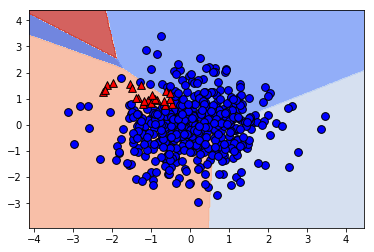

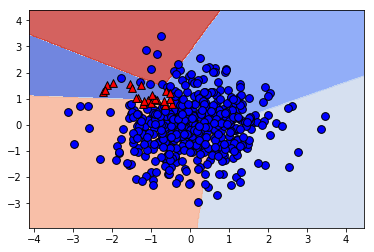

Softmax     training accuracy: 0.952
One-vs-rest training accuracy: 0.902


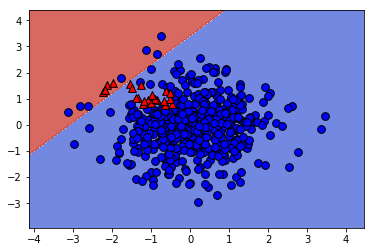

In [37]:
lr_ovr = LogisticRegression()
lr_ovr.fit(X_train, y_train)

plot_classifier(X_train, y_train==1, lr_ovr)

lr_mn = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_mn.fit(X_train, y_train)

plot_classifier(X_train, y_train==1, lr_mn)

# Print training accuracies
print("Softmax     training accuracy:", lr_mn.score(X_train, y_train))
print("One-vs-rest training accuracy:", lr_ovr.score(X_train, y_train))

# Create the binary classifier (class 1 vs. rest)
lr_class_1 = LogisticRegression(C=100)
lr_class_1.fit(X_train, y_train==1)

# Plot the binary classifier (class 1 vs. rest)
plot_classifier(X_train, y_train==1, lr_class_1)

Nice work! As you can see, the binary classifier incorrectly labels almost all points in class 1 (shown as red triangles in the final plot)! Thus, this classifier is not a very effective component of the one-vs-rest classifier. In general, though, one-vs-rest often works well.

<h2>One-vs-rest SVM</h2>
As motivation for the next and final chapter on support vector machines, we'll repeat the previous exercise with a non-linear SVM. Once again, the data is loaded into X_train, y_train, X_test, and y_test . Instead of using LinearSVC, we'll now use scikit-learn's SVC object, which is a non-linear "kernel" SVM (much more on what this means in Chapter 4!). Again, your task is to create a plot of the binary classifier for class 1 vs. rest.

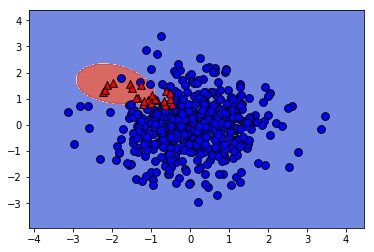

In [38]:
# We'll use SVC instead of LinearSVC from now on
from sklearn.svm import SVC

# Create/plot the binary classifier (class 1 vs. rest)
svm_class_1 = SVC()
svm_class_1.fit(X_train, y_train==1)
plot_classifier(X_train, y_train==1, svm_class_1)

<h1>Chapter 4</h1>

<h2>Effect of removing examples</h2>
Support vectors are defined as training examples that influence the decision boundary. In this exercise, you'll observe this behavior by removing non support vectors from the training set. The wine quality dataset is already loaded into X and y (first two features only). (Note: we specify lims in plot_classifier so that the two plots are forced to use the same axis limits and can be compared directly.)

In [44]:
wine = datasets.load_wine()
X, y = wine.data, wine.target

X = X[:, :2]

[[14.23  1.71]
 [13.2   1.78]
 [13.16  2.36]
 [14.37  1.95]
 [13.24  2.59]
 [14.2   1.76]
 [14.39  1.87]
 [14.06  2.15]
 [14.83  1.64]
 [13.86  1.35]
 [14.1   2.16]
 [14.12  1.48]
 [13.75  1.73]
 [14.75  1.73]
 [14.38  1.87]
 [13.63  1.81]
 [14.3   1.92]
 [13.83  1.57]
 [14.19  1.59]
 [13.64  3.1 ]
 [14.06  1.63]
 [12.93  3.8 ]
 [13.71  1.86]
 [12.85  1.6 ]
 [13.5   1.81]
 [13.05  2.05]
 [13.39  1.77]
 [13.3   1.72]
 [13.87  1.9 ]
 [14.02  1.68]
 [13.73  1.5 ]
 [13.58  1.66]
 [13.68  1.83]
 [13.76  1.53]
 [13.51  1.8 ]
 [13.48  1.81]
 [13.28  1.64]
 [13.05  1.65]
 [13.07  1.5 ]
 [14.22  3.99]
 [13.56  1.71]
 [13.41  3.84]
 [13.88  1.89]
 [13.24  3.98]
 [13.05  1.77]
 [14.21  4.04]
 [14.38  3.59]
 [13.9   1.68]
 [14.1   2.02]
 [13.94  1.73]
 [13.05  1.73]
 [13.83  1.65]
 [13.82  1.75]
 [13.77  1.9 ]
 [13.74  1.67]
 [13.56  1.73]
 [14.22  1.7 ]
 [13.29  1.97]
 [13.72  1.43]
 [12.37  0.94]
 [12.33  1.1 ]
 [12.64  1.36]
 [13.67  1.25]
 [12.37  1.13]
 [12.17  1.45]
 [12.37  1.21]
 [13.11  1

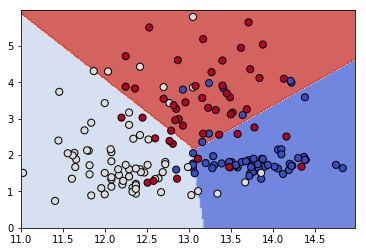

Number of original examples 178
Number of support vectors 81


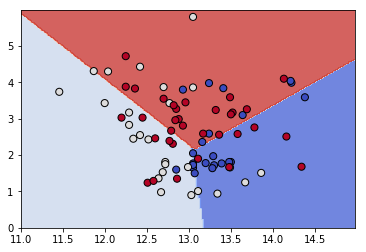

In [45]:
# Train a linear SVM
svm = SVC(kernel="linear")
svm.fit(X, y)
plot_classifier(X, y, svm, lims=(11,15,0,6))

# Make a new data set keeping only the support vectors
print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_]
y_small = y[svm.support_]

# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_small, y_small)
plot_classifier(X_small, y_small, svm_small, lims=(11,15,0,6))

Nice! Compare the decision boundaries of the two trained models: are they the same? By the definition of support vectors, they should be!

<h2>GridSearchCV warm-up</h2>
In the video we saw that increasing the RBF kernel hyperparameter gamma increases training accuracy. In this exercise we'll search for the gamma that maximizes cross-validation accuracy using scikit-learn's GridSearchCV. A binary version of the handwritten digits dataset, in which you're just trying to predict whether or not an image is a "2", is already loaded into the variables X and y.

In [ ]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X, y)

# Report the best parameters
print("Best CV params", searcher.best_params_)

Great job! Larger values of gamma are better for training accuracy, but cross-validation helped us find something different (and better!).

<h2>Jointly tuning gamma and C with GridSearchCV</h2>
In the previous exercise the best value of gamma was 0.001 using the default value of C, which is 1. In this exercise you'll search for the best combination of C and gamma using GridSearchCV.

As in the previous exercise, the 2-vs-not-2 digits dataset is already loaded, but this time it's split into the variables X_train, y_train, X_test, and y_test. Even though cross-validation already splits the training set into parts, it's often a good idea to hold out a separate test set to make sure the cross-validation results are sensible.

In [ ]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

You got it! Note that the best value of gamma, 0.0001, is different from the value of 0.001 that we got in the previous exercise, when we fixed C=1. Hyperparameters can affect each other!

<h2>Using SGDClassifier</h2>
In this final coding exercise, you'll do a hyperparameter search over the regularization type, regularization strength, and the loss (logistic regression vs. linear SVM) using SGDClassifier.

In [ ]:
# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge','log'], 'penalty':['l1', 'l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Congrats, you finished the last exercise in the course! One advantage of SGDClassifier is that it's very fast - this would have taken a lot longer with LogisticRegression or LinearSVC.